In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
% matplotlib inline

In [2]:
def top_k_percentile_views_mask(df, k):
    top_k_percent = df['ViewCount'].nlargest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] > top_k_percent

def bottom_k_percentile_views_mask(df, k):
    bottom_k_percent = df['ViewCount'].nsmallest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] < bottom_k_percent


In [3]:
nsfw_score = pd.read_csv('../data/all_virality_nsfw.csv')
all_data = pd.read_csv('../data/All_data_cbs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
df = all_data.merge(nsfw_score, on='Id')

In [5]:
print nsfw_score.shape
print all_data.shape
print df.shape

(92451, 2)
(92458, 28)
(92451, 29)


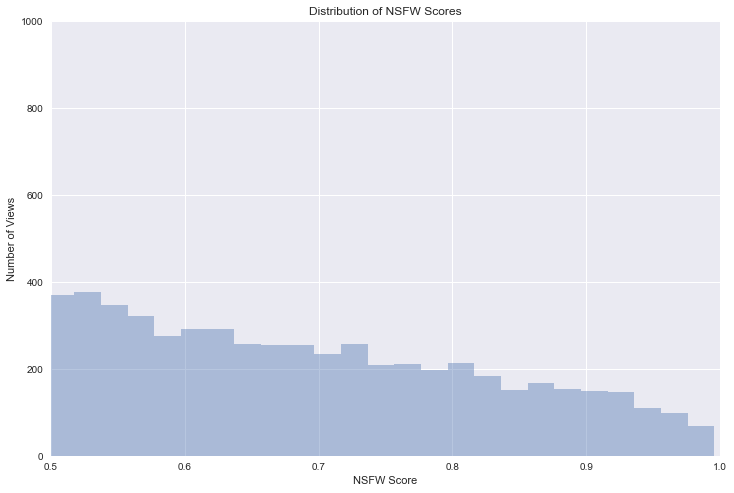

In [19]:
matplotlib.rcParams['figure.figsize'] = [12,8]
sns.distplot(df['nsfw_score'], kde=False)
plt.xlim(0.5,1)
plt.ylim(0,1000)
plt.title('Distribution of NSFW Scores')
plt.xlabel('NSFW Score')
plt.ylabel('Number of Views')
plt.show()

In [7]:
df['nsfw_score'].mean()

0.10728215818426619

In [8]:
k = 10
topk = top_k_percentile_views_mask(df, k)
botk = bottom_k_percentile_views_mask(df, k)

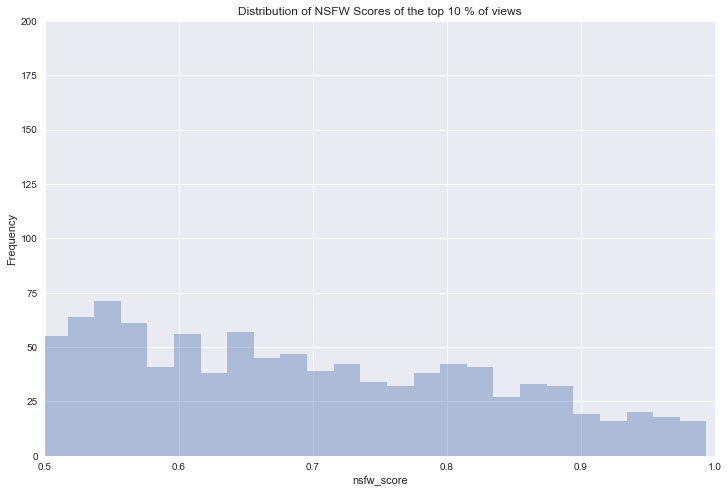

In [24]:
ax = plt.axes()
plt.xlim(0.5,1)
plt.ylim(0,200)
sns.distplot(df[topk]['nsfw_score'], kde=False)
ax.set_title('Distribution of NSFW Scores of the top {0} % of views'.format(k))
plt.ylabel("Frequency")

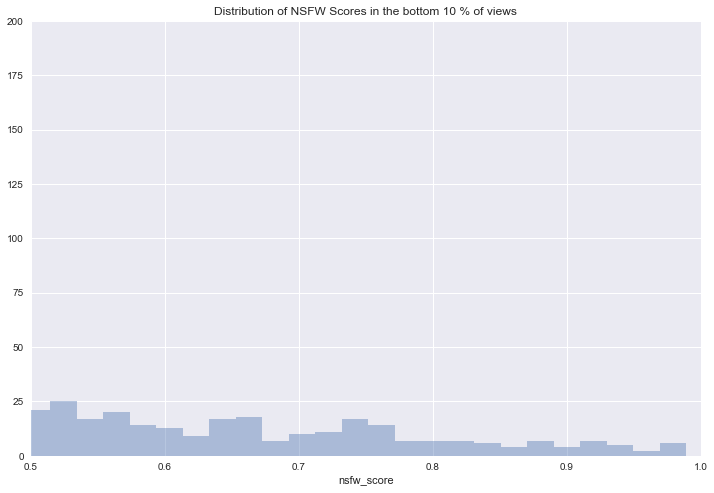

In [23]:
ax = plt.axes()
plt.xlim(0.5,1)
plt.ylim(0,200)
sns.distplot(df[botk]['nsfw_score'], kde=False)
ax.set_title('Distribution of NSFW Scores in the bottom {0} % of views'.format(k))

In [11]:
df[topk]['nsfw_score'].mean()

0.15820877952055332

In [12]:
df[botk]['nsfw_score'].mean()

0.06985431428755359

In [13]:
df['nsfw_score'].mean()

0.10728215818426619